참조 url [https://aileen93.tistory.com/128]

### 데이터전처리 순서  
1.토큰화(Tokenization):문자열에서 단어로 분리시키는 단계  
2.불용어 제거(stop words elimination): 전치사,관사 등 불필요 단어 제거  
3.어간추출(Stemming): 동사원형 등 단어의 기본형태를 추출  
4.문서표현(Representation):  
  - 주어진 문서나 문장을 하나의 벡터로 표현  
  - 단어들을 모두 인덱싱(Indexing)하고 주어진 문서에 존재하는 단어의 빈도수로 문서표현

#### 자연어처리 Python 라이브러리  
**1.KoNLPy(코엔엘파이)**  
&nbsp;&nbsp;&nbsp;&nbsp;한국어 자연어처리  
&nbsp;&nbsp;&nbsp;&nbsp;Okt(구 Twitter), Komoran, Mecab 등 다양한 형태소 분석기 내장  
**2.NLTK(Natural Language Toolkit)**  
&nbsp;&nbsp;&nbsp;&nbsp;영어로 된 텍스트의 자연어처리  
**3.Gensim**  
&nbsp;&nbsp;&nbsp;&nbsp;주로 Topic modeling, Corpus(말뭉치) 및 Word Embedding 모델 지원   
&nbsp;&nbsp;&nbsp;&nbsp;한국어 및 다양한 언어를 지원

In [5]:
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup as soup
from newspaper import Article
from time import sleep
import time
import pandas as pd
import numpy as np

In [6]:
# naver news 기간검색
def naver_search_d(qry,beg,end,pages=3): 
    articles = []
    title = []
    href = []
    date = []
    text = []
    stime = time.time()
    # original 주소 
    url0 = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}&de={2}&docid=&nso=so:r,p:from{3}to{4},a:all&mynews=0&cluster_rank=22&start={5}&refresh_start=0"
    # 네이버 검색결과 page별
    begx = beg.replace('.','')
    endx = end.replace('.','')
    for i in range(pages): 
        start = i*10+1
        qry1 = quote_plus(qry)
        url = url0.format(qry1,beg,end,begx,endx,start)
        obj = soup(urlopen(url),'html.parser')
        # links : naver 검색결과 뉴스들의 링크들
        links = obj.find_all('a',{'class':'_sp_each_title'})
        # 링크별 기사가져오기 
        for link in links:
            h = link.get('href') # hyperlink
            try:
                a = Article(h,language='ko') # 기사가져오기 
                a.download();a.parse()
                articles.append(a)
                title.append(a.title)
                date.append(a.publish_date)
                text.append(a.text)
            except:
                pass
            sleep(np.random.randint(1,4))
    etime = time.time() - stime
    elaps = time.strftime('%H:%M:%S',time.gmtime(etime))
    news = pd.DataFrame(dict(qry=qry,date=date,title=title,text=text))        
    print('{} {} search done, {} elapsed'.format(qry,begx[:4],elaps))
    return news
# naver_search_d

In [7]:
%%time
drng = lambda x,y,f: pd.date_range(x,y,freq=f).strftime('%Y.%m.%d')
frm = drng('2018','2019','YS')
tom = drng('2018','2019','Y')
news = []
for f,t in zip(frm,tom):
    news.append(naver_search_d('가계부채+가계대출',f,t,pages=5))

가계부채+가계대출 2018 search done, 00:02:15 elapsed
Wall time: 2min 15s


In [8]:
newsdf = pd.concat(news,axis=0)

In [9]:
newsdf.shape

(49, 4)

In [10]:
newsdf.head()

,qry,date,title,text
0,가계부채+가계대출,2018-12-30 06:21:00+09:00,"'커지는 빚부담'…원리금 상환액 증가율, 가처분소득의 3배",부채 보유 가구 기준…원리금 상환액 6년새 85% 늘어\n\n대출거래약정서[연합뉴스...
1,가계부채+가계대출,2019-01-07 00:00:00+09:00,,가계부채 증가율 2016년부터 7분기 연속 떨어져 … 가계 연체율 2018년 1분기...
2,가계부채+가계대출,2018-12-31 03:00:00+09:00,"빚 갚는데 쓴 돈, 소득보다 3배 빨리 불어… 서민 허리 휘청",가계의 원리금 상환액이 이처럼 빠른 속도로 늘어나면 내년도 통화정책도 영향을 받을 ...
3,가계부채+가계대출,2018-12-31 11:16:58+09:00,내년 이자이익 하락 처한 은행권…‘디지털·글로벌’ 강화 시급,2019년 당기순익 예상치 올해보다 2조원 감소 전망\n\n서울 광화문에 설치된 국...
4,가계부채+가계대출,2018-12-29 13:45:39+01:00,연합뉴스TV :: 대한민국 뉴스의 시작. 채널 23,집값 떨어지니 가계빚 걱정…’부동산의 그늘’\n\n[앵커]\n\n올 한해 대한민국의...


In [196]:
from konlpy.tag import Kkma, Okt
import nltk

In [193]:
kkma = Kkma()
okt = Okt()

In [194]:
newsdf['nouns'] = newsdf.text.apply(lambda x: okt.nouns(x))

**freq plot**

In [197]:
txt = nltk.Text(newsdf.nouns[0])

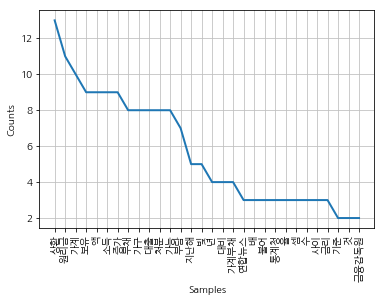

In [199]:
txt.plot(30)